In [1]:
# %env ROS_IP=127.0.0.1
# %env ROS_MASTER_URI=http://127.0.0.1:11311

# !export ROS_MASTER_URI=http://127.0.0.1:11311
# !export ROS_IP=127.0.0.1

# !echo $ROS_IP
# !echo $ROS_MASTER_URI


In [2]:
from visioncraft.locobot.camera import LocobotCamera
from visioncraft.locobot.arm_control import LocobotArmControl
from geometry_msgs.msg import Pose
from tf.transformations import quaternion_from_euler
import numpy as np
import matplotlib.pyplot as plt


pybullet build time: Jan 29 2025 23:19:57


In [3]:
cam = LocobotCamera(use_simulation=False)


In [4]:
arm_control = LocobotArmControl(use_simulation=False)


[INFO] [1746016260.922681]: Waiting for joint trajectory action on /locobot/arm_controller/follow_joint_trajectory…
[INFO] [1746016261.168704]: Joint‐space action server ready
[ INFO] [1746016261.201799665]: Loading robot model 'locobot'...


[ WARN] [1746016261.197958912]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200689338]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200736008]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200752708]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200772000]: Link 'locobot/caster_back_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200786332]: Link 'locobot/caster_front_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200806827]: Link 'locobot/wheel_left_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200821375]: Link 'locobot/wheel_right_link' is not known to URDF. Cannot disable/enable collisons.
[ WARN] [1746016261.200837587]: Link 'locobot/ca

[ INFO] [1746016261.201825917]: No root/virtual joint specified in SRDF. Assuming fixed joint
[ INFO] [1746016263.040665804]: Ready to take commands for planning group interbotix_arm.
[INFO] [1746016263.550884]: LocobotArmControl initialized


In [5]:
arm_control.open_gripper()

In [6]:
arm_control.close_gripper()

[WARN] [1746016263.693783]: ❌ No object detected before fully closed


In [7]:
arm_control.go_to_coordinate([0.3, 0.2, 0.15])

In [8]:
arm_control.linear_motion([0.3, 0.2, 0.05])

In [9]:
arm_control.move_arm_joints(LocobotArmControl.JOINT_SLEEP)

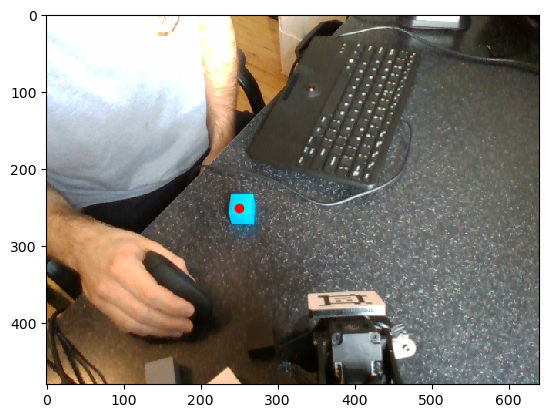

In [17]:
# Example: Grab cube at center of image
cam.pan(0.0)
cam.tilt(1.1)
height, width = cam.image.shape[:2]
center_x = 250
center_y = 250

plt.imshow(cam.image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

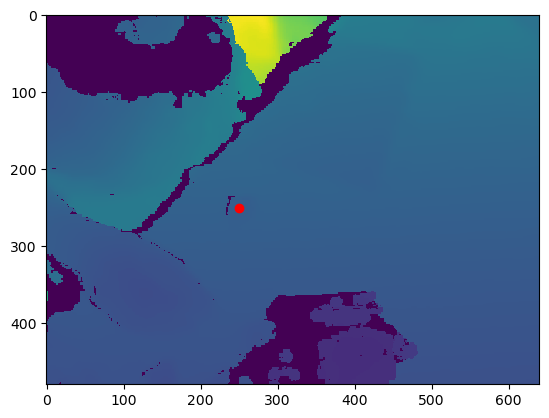

In [18]:
plt.imshow(cam.depth_image)
# add point on top of the image
plt.scatter(center_x, center_y, color='red')

In [19]:
point_cam = cam.get_point_at_pixel(center_x, center_y)
print(point_cam)


point_base = cam.get_target_coordinate_from_camera(point_cam)
print(point_base)

[-0.07262075  0.01885709  0.59800005]
[0.39988069900918005, 0.08715567439894811, 0.03972781157044475]


In [ ]:
print(f"Point in base frame: {point_base}")

arm_control.pick(point_base)

Point in base frame: [0.39988069900918005, 0.08715567439894811, 0.03972781157044475]
Arrived at target pose
Trying to go to target grab
object detected


In [21]:
point_base_2 = point_base + np.array([-0.1, -0.1, 0.0])
arm_control.place(point_base_2,)

Trying to place cube at coordinates :  [ 0.2998807  -0.01284433  0.03972781]
Trying to go to target place
Trying to go to drop place


In [21]:
arm_control.open_gripper()

In [22]:
arm_control.close_gripper()

object detected
